In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, recall_score, precision_score, plot_precision_recall_curve

In [26]:
df_test = pd.read_csv(project.get_file('features_test.csv'),index_col=0)

scaler, LR_clfr, thresh = pickle.load(project.get_file('scaler_and_LR_clfr_and_thresh.pkl'))

In [27]:
num_recipes = len(df_test)
num_target = len(df_test[df_test['target'] == 1].index)

print('The test set contains ' + str(num_recipes) + ' recipes.')
print('The number of recipes which will achieve the popularity threshold by the target time is ' + str(num_target) + '.')
print('So we are trying to predict an outcome achieved by ' + str(100 * num_target / num_recipes) + '% of recipes.')

The test set contains 228553 recipes.
The number of recipes which will achieve the popularity threshold by the target time is 123.
So we are trying to predict an outcome achieved by 0.05381683898264297% of recipes.


In [28]:
X_test = df_test.drop(columns='target')
y_test = df_test['target']

X_test_scaled = scaler.transform(X_test)

predictions = LR_clfr.predict_proba(X_test_scaled)[:,1]

print('Model Scores.')
print('Average precision score: ' + str(average_precision_score(y_test,predictions)))
print('Area under the ROC curve: ' + str(roc_auc_score(y_test,predictions)))
print('Recall score: ' + str(recall_score(y_test,(predictions >= thresh))))
print('Precision score: ' + str(precision_score(y_test,(predictions >= thresh))))

Model Scores.
Average precision score: 0.353919736634374
Area under the ROC curve: 0.99902547933241
Recall score: 0.3170731707317073
Precision score: 0.4482758620689655


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.354')

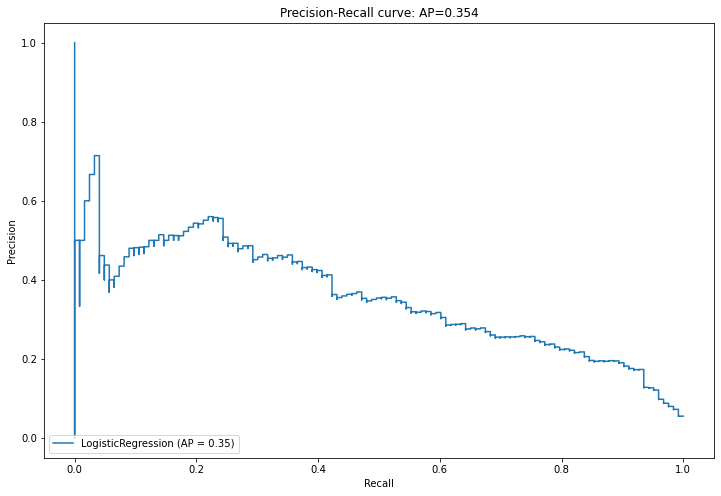

In [29]:
disp = plot_precision_recall_curve(LR_clfr, X_test_scaled, y_test)
disp.figure_.set_size_inches(12, 8)
disp.ax_.set_title('Precision-Recall curve: ' + 
                   'AP={0:0.3f}'.format(average_precision_score(y_test,predictions)))

In [30]:
df_test_predictions = y_test.to_frame()
df_test_predictions['predicted_proba'] = predictions
df_test_predictions['prediction'] = (predictions >= thresh)

df_test_predictions.sort_values('predicted_proba', ascending=False)[:30]

,target,predicted_proba,prediction
recipe_id,,,
517863,0,0.194596,True
203785,1,0.154196,True
475446,0,0.146459,True
160202,1,0.140755,True
190605,1,0.139137,True
361631,1,0.137351,True
249520,1,0.134119,True
63746,0,0.133628,True
324890,0,0.133572,True


In [31]:
num_predictions = len(df_test_predictions[df_test_predictions['prediction'] == True])
num_correct_predictions = len(df_test_predictions[(df_test_predictions['prediction'] == True) & (df_test_predictions['target'] == 1)])

print('Looking at ' + str(num_recipes) + ' recipes, our model predicts that ' + str(num_predictions) + ' will achieve the popularity threshold by the target time.')
print()
print('Of these predictions, ' + str(num_correct_predictions) + ' of them are correct.')
print()
print('The model fails to predict ' + str(num_target - num_correct_predictions) + ' recipes which do achieve the threshold.')

Looking at 228553 recipes, our model predicts that 87 will achieve the popularity threshold by the target time.

Of these predictions, 39 of them are correct.

The model fails to predict 84 recipes which do achieve the threshold.


In [32]:
feature_weights = pd.DataFrame(LR_clfr.coef_[0],index=df_test.columns[1:]).rename(columns={0:'Weight'})
feature_weights.index.names = ['Feature']

feature_weights

,Weight
Feature,
total_ratings_curr,9.510938
age_in_days,-1.376588
rating_pace,0.280316
RUSNB_proba_pred,0.537616
mean_rating_curr,-1.071987
minutes,-0.000327
n_steps,0.490753
n_ingredients,0.264547
calories,0.002297


In [33]:
feature_weights['Absolute_Weight'] = feature_weights['Weight'].apply(np.abs)
feature_weights.sort_values(by='Absolute_Weight',ascending=False)

,Weight,Absolute_Weight
Feature,,
total_ratings_curr,9.510938,9.510938
age_in_days,-1.376588,1.376588
mean_rating_curr,-1.071987,1.071987
innovation_jaccard_avg,0.910835,0.910835
innovation_IDF,0.782777,0.782777
RUSNB_proba_pred,0.537616,0.537616
n_steps,0.490753,0.490753
LIX_score,-0.391925,0.391925
rating_pace,0.280316,0.280316
